# SCC0251 - Image Processing

## Assignment 2: Image Enhancement and Filtering

Authors:
* 10262648 - Gabriel Kanegae Souza
* 10262652 - João Vitor dos Santos Tristão

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [2]:
def root_square_error(input_img, output_img):
    """Calculates and returns the Root Squared Error between two images."""
    rse = np.sqrt(np.sum(np.power(output_img - input_img, 2)))

    return rse

def gaussian(x, sigma):
    """Gaussian"""
    return np.exp((-x**2)/(2*sigma**2))/(2*np.pi*sigma**2)

def padding(img, n):
    """Zero-padding of n rows and n cols"""
    img = np.pad(img, [(n, n), (n, n)], mode='constant', constant_values=0)

    return img

def unpadding(img, n):
    """Unpadding of n rows and n cols"""
    img = img[n:img.shape[0]-n, n:img.shape[1]-n]

    return img

def normalization(img):
    """Normalizes image to values between 0 and 255"""
    max_val = img.max()
    min_val = img.min()

    return ((img-min_val)*255)/max_val

def build_filter(n, sigma):
    """Builds the spatial gaussian filter"""
    filter_ = np.zeros((n,n))

    begin = n//2

    for i in range(n):
        for j in range(n):
            val = ((i-begin)**2 + (j-begin)**2)**0.5
            filter_[i][j] = gaussian(val, sigma)

    return filter_

def bilateral_filter(img, n, sigma_s, sigma_r):
    """Applies bilateral filter using gaussians"""
    filter_ = build_filter(n, sigma_s)
    
    original_shape = list(img.shape)

    pad = n//2
    img = padding(img, pad)
    
    new_img = np.zeros_like(img)

    for i in range(pad, original_shape[0]+pad):
        for j in range(pad, original_shape[1]+pad):
            # Operations happen vectorially around img[i][j]
            
            # Grid centered in img[i][j]
            sub_matrix = img[i-pad:i+pad+1, j-pad:j+pad+1]

            gr = gaussian(sub_matrix-img[i][j], sigma_r)
            
            wt = np.multiply(gr, filter_)
            w = np.sum(wt)

            pixel = np.sum(np.multiply(wt, sub_matrix))
            pixel = pixel/w

            new_img[i][j] = pixel

    new_img = unpadding(new_img, pad)
    
    return new_img

def laplacian_filter(img, c, kernel_val):
    """Applies thelapacian filter"""
    if kernel_val == 1:
        kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    elif kernel_val == 2:
        kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    original_shape = list(img.shape)

    img = padding(img, 1)
    filtered_img = np.zeros_like(img)

    for i in range(1, original_shape[0]+1):
        for j in range(1, original_shape[1]+1):
            sub_matrix = img[i-1:i+2, j-1:j+2]
            filtered_img[i][j] = np.sum(np.multiply(kernel, sub_matrix))

    filtered_img = unpadding(filtered_img, 1)
    img = unpadding(img, 1)

    filtered_img = normalization(filtered_img)
    
    img = filtered_img*c + img

    img = normalization(img)

    return img

def gaussian_kernel(dim, sigma):
    """Builds gaussian kernel vector"""
    kernel = np.zeros(dim)

    if dim%2 == 0:
        begin = dim//2-1
    else:
        begin = dim//2

    for i in range(dim):
        kernel[i] = gaussian(i-begin, sigma)

    return kernel

def vignette_filter(img, sigma_row, sigma_col):
    """Applies vignette filter"""
    dim = list(img.shape)
    
    w_row = gaussian_kernel(dim[0], sigma_row)
    w_row = w_row.reshape((-1, 1))

    w_col = gaussian_kernel(dim[1], sigma_col)

    w = w_row * w_col

    img = img*w
    img = normalization(img)

    return img

### Example - Bilateral Filter

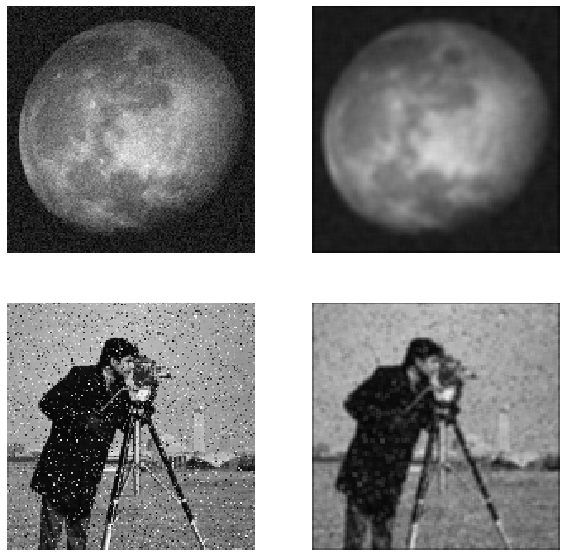

In [3]:
camera = imageio.imread("images/camera.png")
moon = imageio.imread("images/moon.png")

camera_bilateral = bilateral_filter(camera, 3, 150.0, 100.0) 
moon_bilateral = bilateral_filter(moon, 5, 50.0, 100.0)

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(moon, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(222)
plt.imshow(moon_bilateral, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(223)
plt.imshow(camera, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(224)
plt.imshow(camera_bilateral, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.show()

### Example - Laplacian Filter

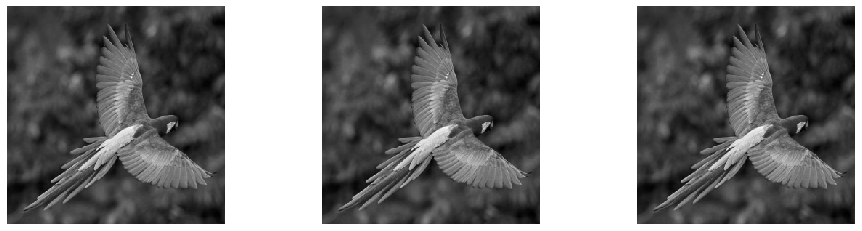

In [4]:
arara = imageio.imread("images/arara.png")

arara_laplace1 = laplacian_filter(arara, 0.5, 1)
arara_laplace2 = laplacian_filter(arara, 0.75, 2)

plt.figure(figsize=(16, 4))

plt.subplot(131)
plt.imshow(arara, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(132)
plt.imshow(arara_laplace1, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(133)
plt.imshow(arara_laplace2, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.show()

### Exemplo - Vignette Filter

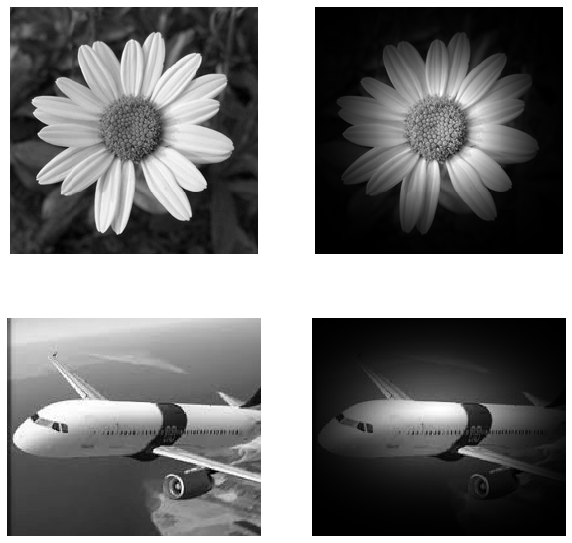

In [5]:
flower = imageio.imread("images/flower.png")
airplane = imageio.imread("images/airplane.png")

flower_vignette = vignette_filter(flower, 50.0, 50.0)
airplane_vignette = vignette_filter(airplane, 30.0, 45.0)

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(flower, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(222)
plt.imshow(flower_vignette, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(223)
plt.imshow(airplane, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(224)
plt.imshow(airplane_vignette, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.show()